# Spam - Detection 

----------------------------------

## Dataset : SMS Spam Collection Data Set

## Source :
- Tiago A. Almeida (talmeida ufscar.br)
  Department of Computer Science
  Federal University of Sao Carlos (UFSCar)
  Sorocaba, Sao Paulo - Brazil

  JosÃ© MarÃ­a GÃ³mez Hidalgo (jmgomezh yahoo.es)
  R&D Department Optenet
  Las Rozas, Madrid - Spain
  
## Data Set Information:

- This corpus has been collected from free or free for research sources at the Internet:

- A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
- A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
- A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
- Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

- GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

-  Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

-  Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.  


## Attribute Information:

- The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

- ham What you doing?how are you?
- ham Ok lar... Joking wif u oni...
- ham dun say so early hor... U c already then say...
- ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
- ham Siva is in hostel aha:-.
- ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
- spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
- spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
- spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

- Note: the messages are not chronologically sorted.

# Loading the Data :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [2]:
df = pd.read_csv("SMSSpamCollection",sep='\t',names=["target","message"])

In [3]:
df.head(6)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [4]:
df.shape

(5572, 2)

# Exploratory Data Analysis:

In [5]:
df["target"].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

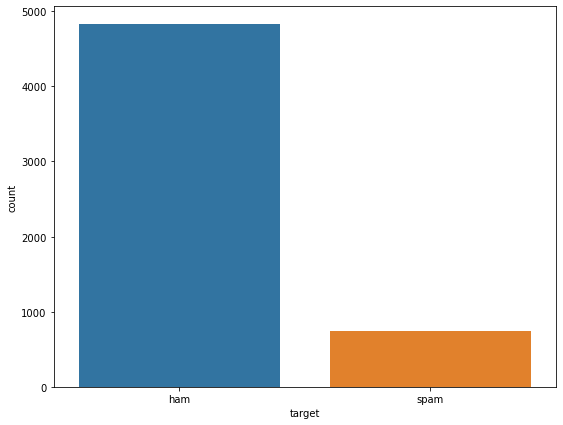

In [6]:
plt.figure(figsize=(9,7))
sns.countplot(data=df,x="target")

## WordClouds

In [7]:
from wordcloud import WordCloud,STOPWORDS 


In [8]:
df_spam=df.loc[df.target=="spam",:]

In [9]:
df_spam["target"].value_counts()

spam    747
Name: target, dtype: int64

In [10]:
words=" ".join(df.message)


In [11]:
sp_clean_words=" ".join([word for word in words.split()
                      if "http" not in word and not word.startswith("&") and not word.startswith("0")])

In [12]:
sp_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="black",
                      width=1600,
                      height=800).generate(sp_clean_words)
                        

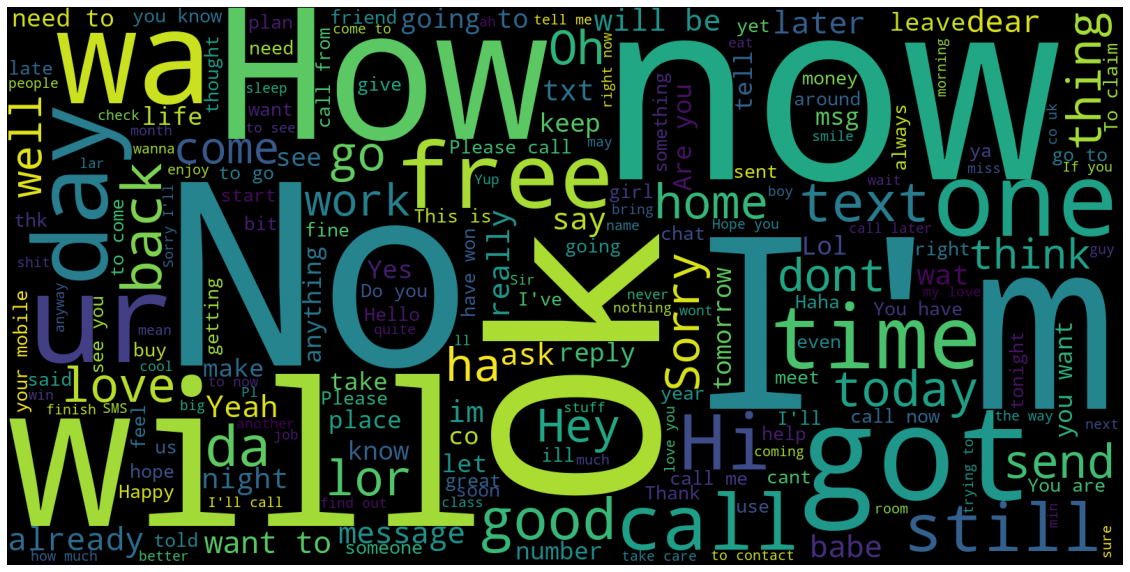

In [13]:
plt.figure(1,figsize=(20,20))
plt.imshow(sp_wordcloud)
plt.axis('off')
plt.show()

**- Wordcloud for all the spams**

--------------

In [14]:
df_ham=df.loc[df.target=="ham",:]

In [15]:
df_ham.target.value_counts()

ham    4825
Name: target, dtype: int64

In [16]:
h_words=" ".join(df_ham.message)



In [17]:
h_clean_words=" ".join([word for word in h_words.split() if not word.startswith("&")])

In [18]:
h_wordcloud=WordCloud(stopwords=STOPWORDS,
                     background_color='black',
                     height=1600,
                     width=800).generate(h_clean_words)

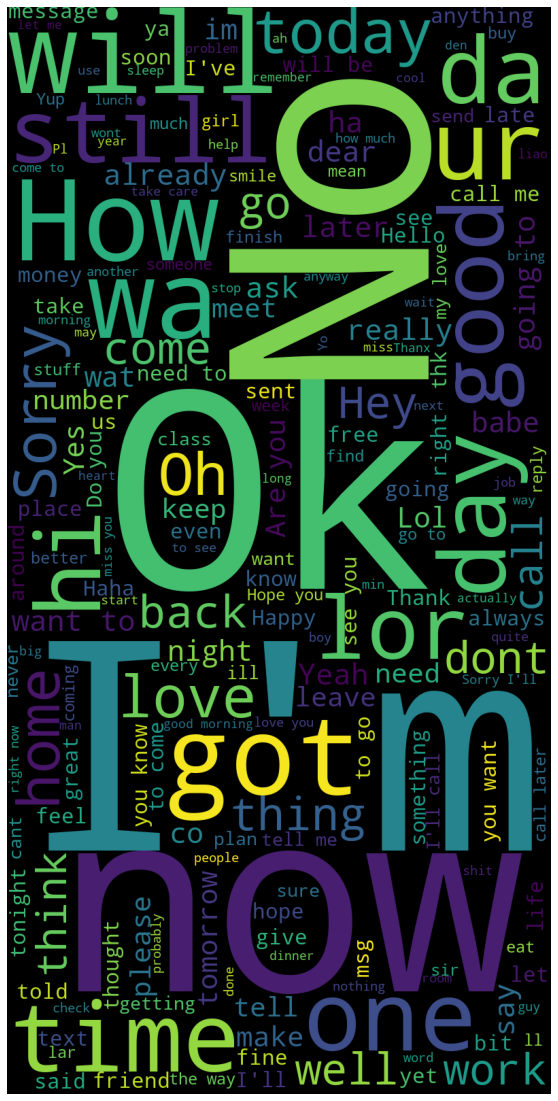

In [19]:
plt.figure(figsize=(30,20))
plt.imshow(h_wordcloud)
plt.axis("off")
plt.show()

**-WordCloud for all the hams**

------------------

# DataPreprocessing :- 

In [20]:
# Step - 3 - Preprocess the data


# Remove special characters
# Conversion to lowercase
# Tokenization
# Stemming or Lemmatization


In [21]:
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [22]:
clean_text_ls=[]  #initialising list
lemmatizer=WordNetLemmatizer()

### Defining a preprocessing  function:


In [23]:
def preprocess(raw_message):
    #removing special symbols
    letters_only=re.sub("[^a-zA-Z]"," ",raw_message)
    
    #converting to the lowercase to all
    lower_words=letters_only.lower()
    
    #tokenizing
    words=lower_words.split()
    
    #removing stop words
    words=[word for word in words if not word in stopwords.words("english")] 
    
    #lemmatization 
    words = [lemmatizer.lemmatize(word) for word in words]
    
    
    return(" ".join(words))
   

In [24]:


df["clean_message"]=df["message"].apply( lambda x : preprocess(x))



In [25]:
df

,target,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,ham,Will ü b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


------------------

#  Data Preparation 

In [26]:
#train and test split

from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,train_size=0.75,random_state=42)

In [27]:
y_test=test_df["target"]
print(len(y_test))

1393


In [28]:
print(len(train_df))
print(len(test_df))

4179
1393


In [29]:
train_lst=[]
for word in train_df["clean_message"]:
    train_lst.append(word)
test_lst=[]
for word in test_df["clean_message"]:
    test_lst.append(word)
  

In [30]:
#Using Bag of Words to convert the Text data to Numerical Vectors
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_lst)

test_features = vectorizer.transform(test_lst)


In [31]:
vectorizer.vocabulary_

{'winner': 5912,
 'valued': 5677,
 'network': 3488,
 'customer': 1202,
 'selected': 4593,
 'receivea': 4269,
 'prize': 4083,
 'reward': 4399,
 'claim': 936,
 'call': 748,
 'code': 986,
 'kl': 2807,
 'valid': 5674,
 'hour': 2410,
 'scotland': 4550,
 'hope': 2391,
 'showing': 4715,
 'jjc': 2695,
 'tendency': 5257,
 'take': 5193,
 'care': 788,
 'live': 2976,
 'dream': 1479,
 'derek': 1323,
 'done': 1448,
 'class': 942,
 'aight': 117,
 'lemme': 2916,
 'know': 2814,
 'yo': 6079,
 'watching': 5806,
 'movie': 3366,
 'netflix': 3485,
 'go': 2117,
 'tell': 5247,
 'friend': 1977,
 'sure': 5136,
 'want': 5785,
 'smoke': 4828,
 'much': 3391,
 'spend': 4934,
 'begging': 493,
 'come': 1009,
 'gosh': 2151,
 'pain': 3749,
 'spose': 4963,
 'better': 518,
 'shall': 4653,
 'send': 4605,
 'exe': 1708,
 'mail': 3109,
 'id': 2474,
 'ok': 3630,
 'arrived': 296,
 'see': 4581,
 'couple': 1123,
 'day': 1246,
 'lt': 3059,
 'awake': 377,
 'snow': 4845,
 'sound': 4899,
 'like': 2945,
 'plan': 3911,
 'cardiff': 786

In [32]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Shape of input data", train_features.shape)

Total unique words: 6116
Shape of input data (4179, 6116)


In [33]:
train_features=train_features.toarray()
test_features=test_features.toarray()

----------------

# Model Building And Evaluation : -

## 1. Logistic Regression:

In [34]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [35]:
classifier.fit(train_features,train_df["target"])

LogisticRegression()

In [36]:
y_pred_log =classifier.predict(test_features)

In [37]:
from sklearn import metrics

accu_log=metrics.accuracy_score(y_test,y_pred_log)
print("accuracy of the logistic regressor model is =",accu_log)

accuracy of the logistic regressor model is = 0.9798994974874372


In [38]:
mat=metrics.confusion_matrix(y_test,y_pred_log)
print(mat)

[[1205    2]
 [  26  160]]


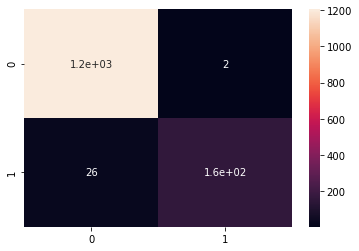

In [39]:
sns.heatmap(mat,annot=True)

In [40]:
print(metrics.classification_report(y_test,y_pred_log))


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       0.99      0.86      0.92       186

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



## 2. Support Vector Classifier :


In [41]:
from sklearn.svm import SVC
svm_clas=SVC()

svm_clas.fit(train_features,train_df["target"])


SVC()

In [42]:
y_pred_svm=svm_clas.predict(test_features)

In [43]:
accu_svm=metrics.accuracy_score(y_test,y_pred_svm)
print("accuracy of the SVM calssifier is =",accu_svm)

accuracy of the SVM calssifier is = 0.9806173725771715


In [44]:
mat_s=metrics.confusion_matrix(y_test,y_pred_svm)
print(mat_s)

[[1205    2]
 [  25  161]]


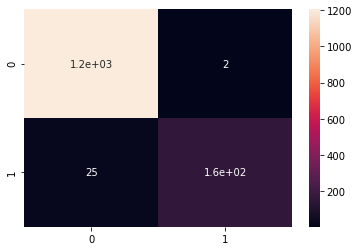

In [45]:
sns.heatmap(mat_s,annot=True)

In [46]:
print(metrics.classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       0.99      0.87      0.92       186

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



# 3. Decision Tree :

In [47]:
from sklearn.tree import DecisionTreeClassifier
Dt_clas=DecisionTreeClassifier()

In [48]:
Dt_clas.fit(train_features,train_df["target"])

DecisionTreeClassifier()

In [49]:
y_pred_dt=Dt_clas.predict(test_features)

In [50]:
accu_dt=metrics.accuracy_score(y_test,y_pred_dt)
print("accuracy of the Decision Tree is = ",accu_dt)

accuracy of the Decision Tree is =  0.9741564967695621


In [51]:
mat_dt=metrics.confusion_matrix(y_test,y_pred_dt)
print(mat_dt)

[[1198    9]
 [  27  159]]


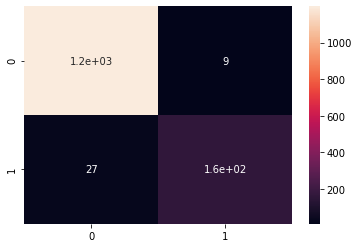

In [52]:
sns.heatmap(mat_dt,annot=True)

In [53]:
print(metrics.classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1207
        spam       0.95      0.85      0.90       186

    accuracy                           0.97      1393
   macro avg       0.96      0.92      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [54]:
accu_df=pd.DataFrame({"Models":["Logistic_Regressor","SVM","Decision_Tree"],"Accuracy":[accu_log,accu_svm,accu_dt]})

# Observation :

In [55]:
accu_df

,Models,Accuracy
0,Logistic_Regressor,0.979899
1,SVM,0.980617
2,Decision_Tree,0.974156


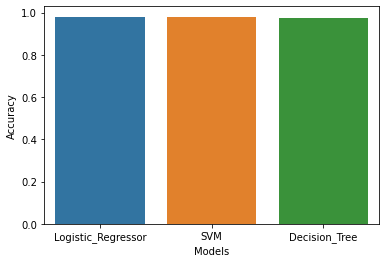

In [56]:
sns.barplot(x="Models",y="Accuracy",data=accu_df)

- We have two types of email as ham and as spam. 
- From above we can say that Our SVM mmodel gives out the best accuarcy as compare to the others.
- Decision Tree gives the less accuracy as comapre to the others. 

### Predicting a message :

In [57]:
#using logistic classifier
def spam_detect(message):
    a= classifier.predict(vectorizer.transform([preprocess(message)]).toarray())
    if(a=="spam"):
        print("It's a SPAM !!")
    else:
        print("It is not a SPAM :)")

In [58]:
spam_detect("WIN!!exciting prizes and many more just CLICK @http://www.winprize.com URL to direct there")

It's a SPAM !!


In [59]:
spam_detect("is this a spam")

It is not a SPAM :)
